In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import sympy as sym
from scipy.integrate import quad
from scipy.integrate import dblquad
from fractions import Fraction

# Punto 7

In [48]:
n = 1000
x = np.linspace(-1,1,n+1)
y = np.linspace(-1,1,n+1)



In [49]:
def f(x,y,R=1.):
    
    z = R**2 - x**2 - y**2
    #print(x,y,z)
    if z < 0.:
        return 0.
    else:
        return np.sqrt(z)
    

In [50]:
f = np.vectorize(f)

In [51]:
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

In [52]:
Volumen=0
area_sq=(x[1]-x[0])**2
for i in range(len(Z)-1):
    for j in range(len(y)-1):
        promedio=(Z[i,j]+Z[i+1,j]+Z[i,j+1]+Z[i+1,j+1])/4
        Volumen+=promedio* area_sq 
print('Él volumen del cascarón esférico es aproximadamente '+str(Volumen))

Él volumen del cascarón esférico es aproximadamente 2.0943883788632625


<IPython.core.display.Javascript object>


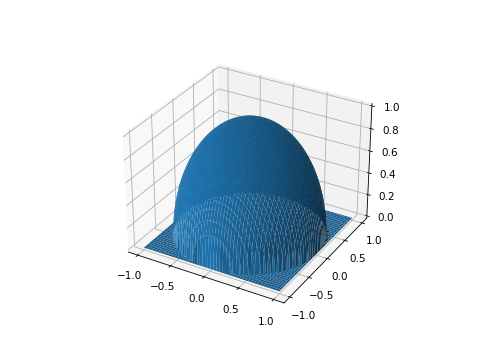

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z)

# Punto 14

In [195]:
x=sym.Symbol('x',Real=True)
c=sym.Symbol('c',Real=True)
polinomio=(3+5*x+x**2)

coeficientes=np.zeros((3,3))
coeficientes_pol=np.zeros((1,3))


n=2
def Legendre(n,x,c):
    c=(x**2-1)**n
    poli=sym.diff(c,x,n)/(2**n  * np.math.factorial(n))
    return poli




In [197]:
for i in range(n+1):
    for j in range(n+1):
        Leg=sym.simplify(Legendre(i,x,c))
        coeficientes[j,i]=Leg.coeff(x,j)
        coeficientes_pol[0,i]=polinomio.coeff(x,i)

inversa=np.linalg.inv(coeficientes)

inversa

array([[1.        , 0.        , 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.66666667]])

In [193]:
base=np.zeros((1,3))
for i in range(len(inversa)):
    valores=0
    for j in range(len(inversa)):
        
        valores+=coeficientes_pol[0,j]*inversa[i,j]
        
        base[0,i]=valores

base=base[0]
base


array([3.33333333, 5.        , 0.66666667])

In [198]:
lista_num=[]
for i in range(len(base)):
    lista_num.append(Fraction(str(base[i])).limit_denominator())
lista_num

[Fraction(10, 3), Fraction(5, 1), Fraction(2, 3)]

In [211]:
respuesta=''
for i in range(len(base)):
    if i ==(len(base)-1):
        respuesta+=('('+str(lista_num[i])+')p'+str(i))+'(x)'
    else:
        respuesta+=('('+str(lista_num[i])+')p'+str(i))+'(x)+'
print('El polinomio respuesta p(x) en la base de Legendre es '+respuesta+'.')

El polinomio respuesta p(x) en la base de Legendre es (10/3)p0(x)+(5)p1(x)+(2/3)p2(x).


# Punto 17

In [690]:
def PolLaguerre(n):
    
    x = sym.Symbol('x',Real=True)
    y = sym.Symbol('y',Real=True)
    y = ((sym.exp(-x)*x**n))
    p = sym.diff(y,x,n)*(sym.exp(x)/(np.math.factorial(n)))
    return p
#PolLaguerre(2)


In [691]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-12):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn
    

In [692]:

def GetRoots(f,df,x,tolerancia = 9):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)
        
        if root != False:
            
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

In [693]:
def GetAllRoots(xn,poli,der_poli):
    
    x = sym.Symbol('x',Real=True)
    
    poly = sym.lambdify([x],poli,'numpy')
    Dpoly= sym.lambdify([x],der_poli,'numpy')
    Roots = GetRoots(poly,Dpoly,xn,tolerancia=8)
    
    return Roots

In [694]:
def Weight_Laguerre(points):
    
    xk=np.linspace(0,100,1000)
    x = sym.Symbol('x',Real=True)
    pesos= []

    ln1=PolLaguerre(points+1)
    ln=PolLaguerre(points)
    ln_sol = sym.lambdify([x],ln,'numpy')  
    d_ln=sym.diff(ln1,x)
    
    
    xi=np.linspace(0,100,1000)
    roots= GetAllRoots(xk, ln1, d_ln)
    
    
    for k in roots:
    
        weight= k/((points+1)**2 * (ln_sol(k)**2))
        
        pesos.append(weight)     
    return pesos

In [695]:
def integralGL(f,n):
    
    integral=0
    
    weight=Weight_Laguerre(n)
    x = sym.Symbol('x',Real=True)
    g=sym.lambdify([x],f,'numpy')
    
   
    
    xk=np.linspace(0,100,1000)
    
    Poli_Lag=PolLaguerre(n+1)
    der_PoliLag=sym.diff(Poli_Lag,x)
    
    roots=GetAllRoots(xk,Poli_Lag,der_PoliLag)
    

    
    for i in range(len(roots)):
        
        integral+=(g(roots[i]))*weight[i]
    return integral

<IPython.core.display.Javascript object>


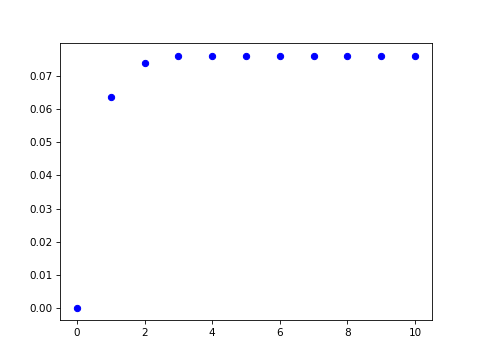

In [697]:

x = sym.Symbol('x',Real=True)
f= ((x**3)/(sym.exp(x) - 1))

n=10
val_x=np.zeros((1,n+1))
val_y=np.zeros((1,n+1))
for i in range(1,n+1):
    estimado=integralGL(f,i)
    error=estimado/(np.pi**4/15)
    val_x[0,i]=i
    val_y[0,i]=error
    

plt.scatter(val_x,val_y,color='b')

plt.show() 